In [1]:
import pandas as pd

# Load the data into a DataFrame
df = pd.read_csv("transactions.csv")

In [2]:
df['TRANSACTION DATE'] = df['TRANSACTION DATE'].str.split(' ').str[0]
df

,TICKET,TRANSACTION DATE,TRANSACTION TYPE,DETAILS,INSTRUMENT,PRICE,UNITS,DIRECTION,SPREAD COST,STOP LOSS,...,TAKE PROFIT,TRAILING STOP,FINANCING,COMMISSION,GSL FEE,GSL PREMIUM,CONVERSION RATE,PL,AMOUNT,BALANCE
0,1.0,2024-02-07,CREATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2024-02-07,CLIENT_CONFIGURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2024-02-07,TRANSFER_FUNDS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.0,250.00
3,4.0,2024-02-07,MARKET_ORDER,CLIENT_ORDER,EUR/USD,NaN,3000.0,Sell,NaN,1.07772,...,1.07675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2024-02-07,ORDER_FILL,MARKET_ORDER,EUR/USD,1.07739,3000.0,Sell,0.15,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.00,NaN,250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,943.0,2024-03-08,TAKE_PROFIT_ORDER,ON_FILL,NaN,1.09283,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
947,944.0,2024-03-08,STOP_LOSS_ORDER,ON_FILL,NaN,1.09447,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
948,945.0,2024-03-08,TRADE_CLIENT_EXTENSIONS_MODIFY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
949,946.0,2024-03-08,ORDER_FILL,STOP_LOSS_ORDER,EUR/USD,1.09447,3000.0,Buy,0.15,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,1.0,-2.34,NaN,202.06


In [3]:
df['TRANSACTION DATE'] = pd.to_datetime(df['TRANSACTION DATE'])
#df.set_index(df['TRANSACTION DATE'], inplace=True)

<Axes: >

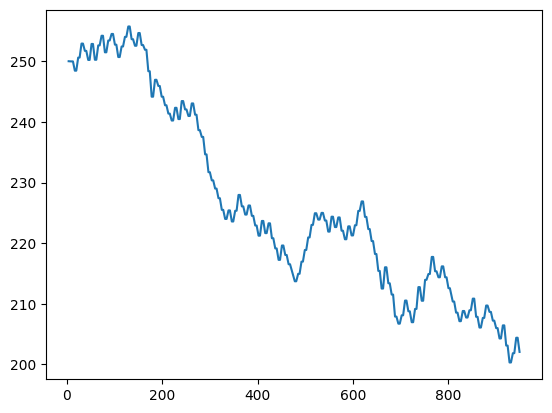

In [4]:
df.dropna(subset=['PL'], inplace=True)
df['BALANCE'].plot()

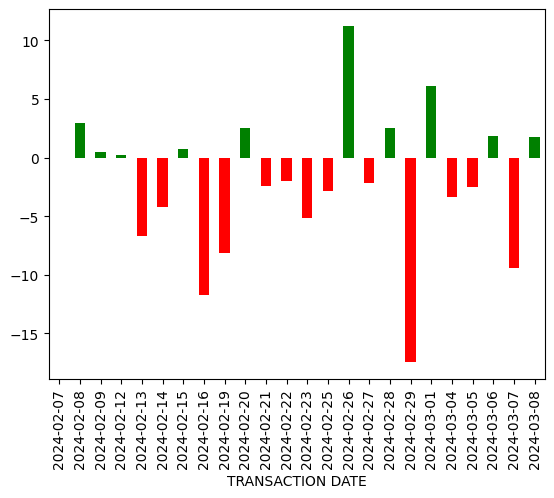

In [5]:
import matplotlib.pyplot as plt

# Map the colors for the bars in the plot
colors = df.groupby(df['TRANSACTION DATE'].dt.date)['PL'].sum().gt(0).map({True: 'g', False: 'r'})

# Create the bar plot with the specified colors
df.groupby(df['TRANSACTION DATE'].dt.date)['PL'].sum().plot(kind='bar', color=colors)
plt.show()


In [6]:
# Load the data into a DataFrame
df = pd.read_csv("transactions.csv")
df['TRANSACTION TIME'] = df['TRANSACTION DATE'].str.split(' ').str[1]
df['TRANSACTION TIME'] = df['TRANSACTION TIME'].str.split(':').str[0]
df.dropna(subset=['PL'], inplace=True)
df

,TICKET,TRANSACTION DATE,TRANSACTION TYPE,DETAILS,INSTRUMENT,PRICE,UNITS,DIRECTION,SPREAD COST,STOP LOSS,...,TRAILING STOP,FINANCING,COMMISSION,GSL FEE,GSL PREMIUM,CONVERSION RATE,PL,AMOUNT,BALANCE,TRANSACTION TIME
4,5.0,2024-02-07 21:04:29 GMT,ORDER_FILL,MARKET_ORDER,EUR/USD,1.07739,3000.0,Sell,0.150,NaN,...,NaN,0.0,0.0,0.0,NaN,NaN,0.00,NaN,250.00,21
9,10.0,2024-02-07 21:05:30 GMT,ORDER_FILL,MARKET_ORDER_TRADE_CLOSE,EUR/USD,1.07740,3000.0,Buy,0.150,NaN,...,NaN,0.0,0.0,0.0,NaN,1.0,-0.03,NaN,249.97,21
13,14.0,2024-02-08 07:46:01 GMT,ORDER_FILL,MARKET_ORDER,EUR/USD,1.07812,3000.0,Buy,0.120,NaN,...,NaN,0.0,0.0,0.0,NaN,NaN,0.00,NaN,249.97,07
17,18.0,2024-02-08 08:20:09 GMT,ORDER_FILL,STOP_LOSS_ORDER,EUR/USD,1.07761,3000.0,Sell,0.150,NaN,...,NaN,0.0,0.0,0.0,NaN,1.0,-1.53,NaN,248.44,08
20,21.0,2024-02-08 09:36:01 GMT,ORDER_FILL,MARKET_ORDER,EUR/USD,1.07804,3000.0,Sell,0.120,NaN,...,NaN,0.0,0.0,0.0,NaN,NaN,0.00,NaN,248.44,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,932.0,2024-03-08 07:23:43 GMT,ORDER_FILL,TAKE_PROFIT_ORDER,EUR/USD,1.09425,3000.0,Buy,0.120,NaN,...,NaN,0.0,0.0,0.0,NaN,1.0,1.53,NaN,201.85,07
938,935.0,2024-03-08 08:46:01 GMT,ORDER_FILL,MARKET_ORDER,EUR/USD,1.09358,3000.0,Sell,0.135,NaN,...,NaN,0.0,0.0,0.0,NaN,NaN,0.00,NaN,201.85,08
942,939.0,2024-03-08 09:18:54 GMT,ORDER_FILL,TAKE_PROFIT_ORDER,EUR/USD,1.09273,3000.0,Buy,0.150,NaN,...,NaN,0.0,0.0,0.0,NaN,1.0,2.55,NaN,204.40,09
945,942.0,2024-03-08 11:26:01 GMT,ORDER_FILL,MARKET_ORDER,EUR/USD,1.09369,3000.0,Sell,0.135,NaN,...,NaN,0.0,0.0,0.0,NaN,NaN,0.00,NaN,204.40,11


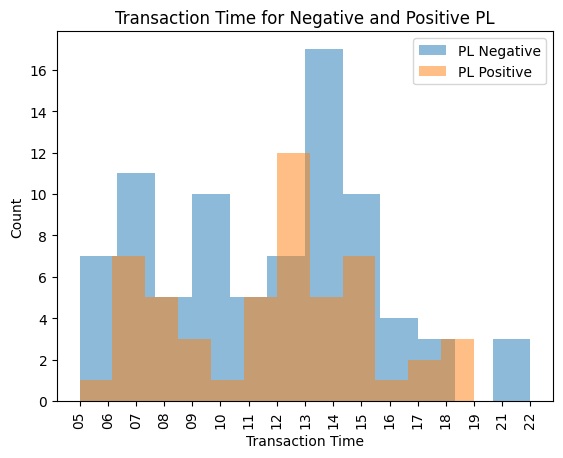

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

#Create a sorted list of unique 'TRANSACTION TIME' values
sorted_transaction_times = sorted(df['TRANSACTION TIME'].unique())
time_to_numeric = {time: i for i, time in enumerate(sorted_transaction_times)}
df['TRANSACTION TIME NUMERIC'] = df['TRANSACTION TIME'].map(time_to_numeric)

# Filter the DataFrame for negative and positive PL
negative_pl = df[df['PL'] < 0]
positive_pl = df[df['PL'] > 0]

bins=12
plt.hist(negative_pl['TRANSACTION TIME NUMERIC'], bins=bins, alpha=0.5, label='PL Negative')
plt.hist(positive_pl['TRANSACTION TIME NUMERIC'], bins=bins, alpha=0.5, label='PL Positive')

plt.xlabel('Transaction Time')
plt.ylabel('Count')
plt.title('Transaction Time for Negative and Positive PL')
plt.legend()

# Replace numeric x-ticks with original 'TRANSACTION TIME' labels
plt.xticks(ticks=range(len(sorted_transaction_times)), labels=sorted_transaction_times, rotation=90)

plt.show()

In [8]:
from scipy.stats import ttest_ind, mannwhitneyu

# Assuming 'TRANSACTION TIME' is already in a suitable numeric format

# Extracting 'TRANSACTION TIME' for positive and negative PL
negative_pl_times = df[df['PL'] < 0]['TRANSACTION TIME'].astype(int)
positive_pl_times = df[df['PL'] > 0]['TRANSACTION TIME'].astype(int)

# Perform an independent t-test
t_stat, p_val_t = ttest_ind(negative_pl_times, positive_pl_times)

# Perform a Mann-Whitney U test
u_stat, p_val_mannwhitney = mannwhitneyu(negative_pl_times, positive_pl_times)

print(f"T-test results: T-statistic = {t_stat}, P-value = {p_val_t}")
print(f"Mann-Whitney U test results: U-statistic = {u_stat}, P-value = {p_val_mannwhitney}")


T-test results: T-statistic = -0.5085467177430862, P-value = 0.6119188849131783
Mann-Whitney U test results: U-statistic = 2003.5, P-value = 0.5571025587960134


The T-test's p-value is much higher than the conventional significance level (alpha) of 0.05. This suggests that there is no statistically significant difference in the means of 'TRANSACTION TIME' between the two groups (positive and negative PL). The T-statistic being close to zero and negative indicates that the mean 'TRANSACTION TIME' for the negative PL group is slightly less than that for the positive PL group, but this difference is not statistically significant.

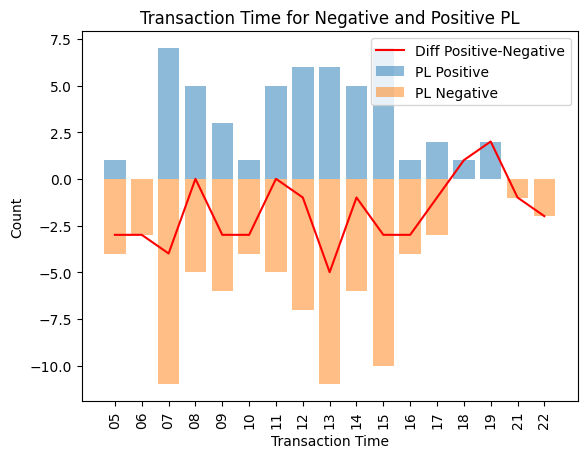

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

positive_pl_counts, _ = np.histogram(positive_pl['TRANSACTION TIME NUMERIC'], bins=np.arange(len(sorted_transaction_times)+1))
negative_pl_counts, _ = np.histogram(negative_pl['TRANSACTION TIME NUMERIC'], bins=np.arange(len(sorted_transaction_times)+1))

plt.bar(range(len(sorted_transaction_times)), positive_pl_counts, alpha=0.5, label='PL Positive')
plt.bar(range(len(sorted_transaction_times)), -negative_pl_counts, alpha=0.5, label='PL Negative')

diff = positive_pl_counts - negative_pl_counts

# Using the same axis for histogram and difference line
ax1 = plt.gca()
ax1.plot(range(len(sorted_transaction_times)), diff, color='r', label='Diff Positive-Negative')
ax1.set_ylabel('Count')

plt.xlabel('Transaction Time')
plt.ylabel('Count')
plt.title('Transaction Time for Negative and Positive PL')
plt.legend()

plt.xticks(ticks=range(len(sorted_transaction_times)), labels=sorted_transaction_times, rotation=90)

plt.show()

